In [1]:
import os
from pipeline_functionality import preprocess_data
from pipeline_functionality import preprocess_training_validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
from imblearn.over_sampling import SMOTE
from scipy.stats import f_oneway

In [2]:
preprocess = preprocess_data(filepath=str(Path(Path.cwd()/"Data"/"train.csv").resolve()))
df = preprocess.read_df()
df = preprocess.rename_columns(df)

In [3]:
df

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Age,Sex,Feature 10,label
0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0,1
1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0,0
2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0,0
3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0,0
4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,626.0,68.0,1771.57,666.99,1117.48,360.21,118.84,2306.82,42,1,1521.0,0
83,1237.0,71.0,1348.53,428.09,924.69,120.02,48.67,1524.78,56,0,1345.0,0
84,634.0,1002.0,1300.00,558.00,724.00,67.00,105.00,1484.26,34,0,2926.0,1
85,112.0,884.0,942.83,378.49,567.06,116.77,31.81,1104.59,33,1,2352.0,1


Checking for missing values

In [4]:
df.isna().sum()

Feature 0     1
Feature 1     1
Feature 2     0
Feature 3     0
Feature 4     0
Feature 5     0
Feature 6     0
Feature 7     0
Age           0
Sex           0
Feature 10    1
label         0
dtype: int64

In [5]:
df[(df["Feature 0"].isna()) & (df["Feature 1"].isna()) & (df["Feature 10"].isna())]

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Age,Sex,Feature 10,label
39,NaN,NaN,1336.54,739.71,550.3,68.46,192.07,1615.68,21,0,NaN,0


There is only one instance of missing values, hence we shall drop that off

In [6]:
df = df.dropna(subset=["Feature 0","Feature 1","Feature 10"])
df

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Age,Sex,Feature 10,label
0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0,1
1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0,0
2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0,0
3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0,0
4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,626.0,68.0,1771.57,666.99,1117.48,360.21,118.84,2306.82,42,1,1521.0,0
83,1237.0,71.0,1348.53,428.09,924.69,120.02,48.67,1524.78,56,0,1345.0,0
84,634.0,1002.0,1300.00,558.00,724.00,67.00,105.00,1484.26,34,0,2926.0,1
85,112.0,884.0,942.83,378.49,567.06,116.77,31.81,1104.59,33,1,2352.0,1


In [7]:
df = df.reset_index(drop=True)

Number of 0:  57
Number of 1:  29


c:\Users\ASUS\Desktop\MSc\MSBD 5001\Predicting_Pneumonia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


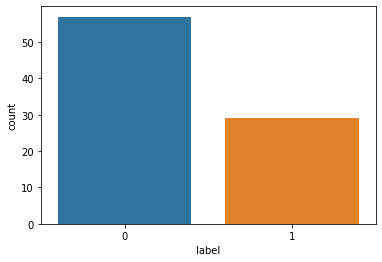

In [8]:
# count = Counter(df_label)

# fig,ax_hist = plt.subplots(1,1,figsize = (8,8))
# ax_hist.bar(x = list(count.keys()),height=[count[k] for k in count.keys()])
sns.countplot(df["label"],label = "Count")
B, M = df["label"].value_counts()
print('Number of 0: ',B)
print('Number of 1: ',M)

Data is imbalanced, hence the minority class needs to be oversampled

In [9]:
oversample = SMOTE()
df_train,df_label = oversample.fit_resample(df[[i for i in df.columns.tolist() if i!="label"]],df[[i for i in df.columns.tolist() if i=="label"]])
# df_train,df_label = df[[i for i in df.columns.tolist() if i!="label"]],df[[i for i in df.columns.tolist() if i=="label"]]

Number of 0:  57
Number of 1:  57


c:\Users\ASUS\Desktop\MSc\MSBD 5001\Predicting_Pneumonia\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


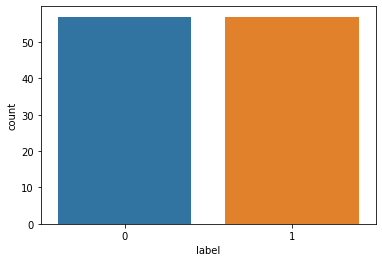

In [10]:
sns.countplot(df_label["label"],label = "Count")
B, M = df_label["label"].value_counts()
print('Number of 0: ',B)
print('Number of 1: ',M)

In [11]:
df.isna().sum()

Feature 0     0
Feature 1     0
Feature 2     0
Feature 3     0
Feature 4     0
Feature 5     0
Feature 6     0
Feature 7     0
Age           0
Sex           0
Feature 10    0
label         0
dtype: int64

EDA will be done on a smaller subset of the dataset, while cross validation will be done using K Fold Cross Validation. 
From the results of EDA, the pipeline will be made to process the entire dataset as per the findings of EDA

In [12]:
# df_eda,df_validation,y_eda,y_validation = train_test_split(df_train,df_label,test_size = 0.2, random_state=42,stratify=df_label)
df_eda,df_validation,y_eda,y_validation = train_test_split(df_train,df_label,test_size = 0.2, random_state=42,stratify=df_label)

In [13]:
# preprocess_eda = preprocess_training_validation()
# df_eda_normalized = preprocess_eda.normalize(df_eda)

In [14]:
# df_validation_normalized = preprocess_eda.normalize(df_validation)

In [15]:
df_eda["labels"] = y_eda
# df_eda["labels"] = y_eda

In [16]:
df_eda

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Age,Sex,Feature 10,labels
86,733.884441,355.755490,484.035230,242.268109,240.294131,142.033360,46.289305,679.220322,39,0,3847.556881,1
89,1384.411576,427.771417,475.365572,312.359673,323.379618,108.746689,31.765921,621.902480,51,0,2281.760278,1
19,403.000000,555.000000,313.480000,131.530000,182.690000,46.680000,7.900000,370.300000,40,0,2209.000000,1
53,1558.000000,611.000000,359.150000,148.650000,191.800000,20.620000,81.520000,467.040000,49,1,2189.000000,1
26,2088.000000,98.000000,962.300000,533.030000,459.720000,370.880000,142.890000,1477.310000,51,1,1599.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
38,1010.000000,1384.000000,570.130000,312.900000,233.840000,80.170000,31.180000,702.080000,56,1,5501.000000,1
56,365.000000,248.000000,300.750000,195.070000,106.580000,13.420000,52.910000,371.300000,41,1,866.000000,1
58,631.000000,182.000000,675.100000,280.090000,386.570000,136.000000,56.230000,875.410000,29,1,3990.000000,0
42,1679.000000,79.000000,483.210000,162.000000,309.000000,227.050000,101.090000,817.240000,39,0,4480.000000,0


In [17]:
# df_eda_normalized_melt = pd.melt(df_eda_normalized,id_vars='labels',var_name='features',value_name='values')
df_eda_melt = pd.melt(df_eda,id_vars='labels',var_name='features',value_name='values')
df_eda_melt

,labels,features,values
0,1,Feature 0,733.884441
1,1,Feature 0,1384.411576
2,1,Feature 0,403.000000
3,1,Feature 0,1558.000000
4,1,Feature 0,2088.000000
...,...,...,...
996,1,Feature 10,5501.000000
997,1,Feature 10,866.000000
998,0,Feature 10,3990.000000
999,0,Feature 10,4480.000000


In [18]:
#One way ANOVA test
def oneway_anova(class1,class2):
    stat,pval = f_oneway(class1,class2)
    if pval < 0.05:
        print(f"Mean difference is statistically significant with pvalue of {pval}")
    else:
        print(f"Mean difference is statistically not significant with pvalue of {pval}")

<h3>Feature Engineering</h3>

- Violin plots on each feature to identify the features that cause the best class separation
- Use Swarm plots too
- Use PCA to check if there is a better visualization of data that can be shown
- One way Anova tests to identify which features have statistically significant differences in feature
- Correlation between each feature to be investigated


Drawing Violin Plots for each feature at hand

<AxesSubplot:xlabel='features', ylabel='values'>

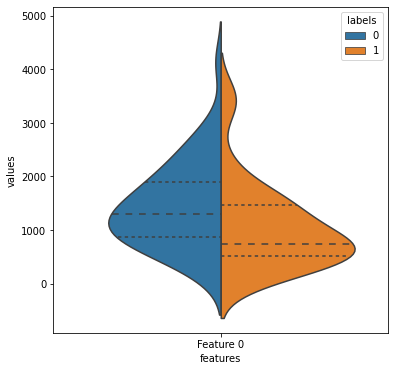

In [19]:
fig,ax_feature1 = plt.subplots(1,1,figsize = (6,6))
sns.violinplot(x = 'features',y = 'values',hue = 'labels',data = df_eda_melt.loc[df_eda_melt["features"].isin(["Feature 0"])],split = True,ax = ax_feature1,inner='quartile')

In [20]:
oneway_anova(df_eda.loc[df_eda["labels"] == 0]["Feature 0"],df_eda.loc[df_eda["labels"] == 1]["Feature 0"])

Mean difference is statistically significant with pvalue of 0.022675474570137945


Conclusion:

Feature 0: MO HLADR+ MFI (cells/ul)

The mean value of each class for Feature 0 is significantly different. Hence it can act as a good feature to separate classification of labels.

<AxesSubplot:xlabel='features', ylabel='values'>

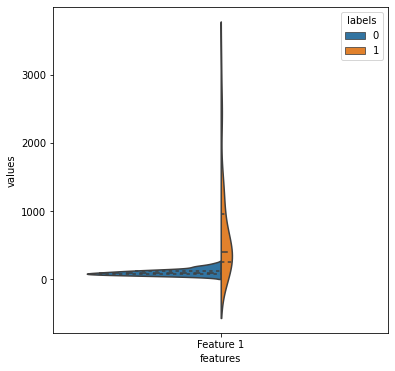

In [21]:
fig,ax_feature2 = plt.subplots(1,1,figsize = (6,6))
sns.violinplot(x = 'features',y = 'values',hue = 'labels',data = df_eda_melt.loc[df_eda_melt["features"].isin(["Feature 1"])],split = True,ax = ax_feature2,inner='quartile')

In [22]:
oneway_anova(df_eda.loc[df_eda["labels"] == 0]["Feature 1"],df_eda.loc[df_eda["labels"] == 1]["Feature 1"])

Mean difference is statistically significant with pvalue of 2.386291176780442e-07


Conclusion:

Feature 1: Neu CD64+MFI (cells/ul)

The mean value of each class for Feature 1 is significantly different with a very low p value. Hence it can act as a good feature to separate classification of labels. As seen in the violin plot, it is clear that label 0 only exists in a small range of values, while label 1 exists in a larger range. This can be used to create a categorical variable for Feature 1.

<AxesSubplot:xlabel='features', ylabel='values'>

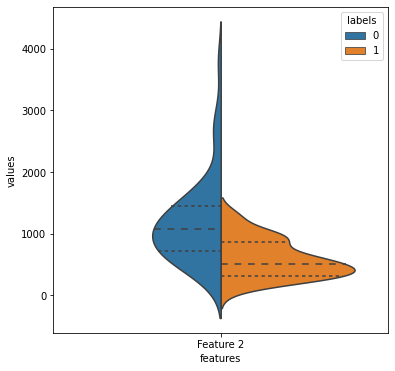

In [23]:
fig,ax_feature3 = plt.subplots(1,1,figsize = (6,6))
sns.violinplot(x = 'features',y = 'values',hue = 'labels',data = df_eda_melt.loc[df_eda_melt["features"].isin(["Feature 2"])],split = True,ax = ax_feature3,inner='quartile')

In [24]:
oneway_anova(df_eda.loc[df_eda["labels"] == 0]["Feature 2"],df_eda.loc[df_eda["labels"] == 1]["Feature 2"])

Mean difference is statistically significant with pvalue of 7.823353826952565e-07


Conclusion:

Feature 2: CD3+T (cells/ul)

The mean value of each class for Feature 2 is significantly different with a very low p value. Hence it can act as a good feature to separate classification of labels.

<AxesSubplot:xlabel='features', ylabel='values'>

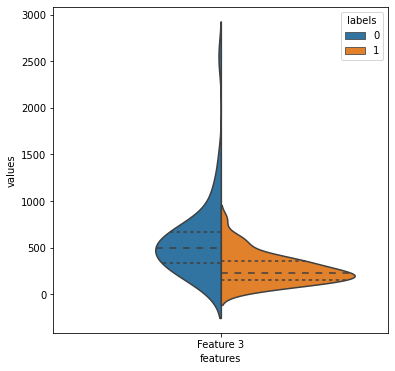

In [25]:
fig,ax_feature4 = plt.subplots(1,1,figsize = (6,6))
sns.violinplot(x = 'features',y = 'values',hue = 'labels',data = df_eda_melt.loc[df_eda_melt["features"].isin(["Feature 3"])],split = True,ax = ax_feature4,inner='quartile')

In [26]:
oneway_anova(df_eda.loc[df_eda["labels"] == 0]["Feature 3"],df_eda.loc[df_eda["labels"] == 1]["Feature 3"])

Mean difference is statistically significant with pvalue of 2.133005234936719e-05


Conclusion:

Feature 3: CD8+T (cells/ul)

The mean value of each class for Feature 3 is significantly different with a very low p value. Hence it can act as a good feature to separate classification of labels.

<AxesSubplot:xlabel='features', ylabel='values'>

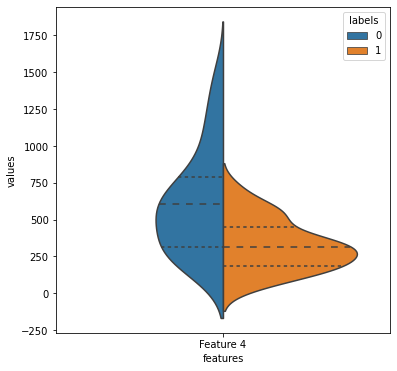

In [27]:
fig,ax_feature5 = plt.subplots(1,1,figsize = (6,6))
sns.violinplot(x = 'features',y = 'values',hue = 'labels',data = df_eda_melt.loc[df_eda_melt["features"].isin(["Feature 4"])],split = True,ax = ax_feature5,inner='quartile')

In [28]:
oneway_anova(df_eda.loc[df_eda["labels"] == 0]["Feature 4"],df_eda.loc[df_eda["labels"] == 1]["Feature 4"])

Mean difference is statistically significant with pvalue of 2.89444200349937e-06


Conclusion:

Feature 4: CD4+T (cells/ul)

The mean value of each class for Feature 4 is significantly different with a very low p value. Hence it can act as a good feature to separate classification of labels.

<AxesSubplot:xlabel='features', ylabel='values'>

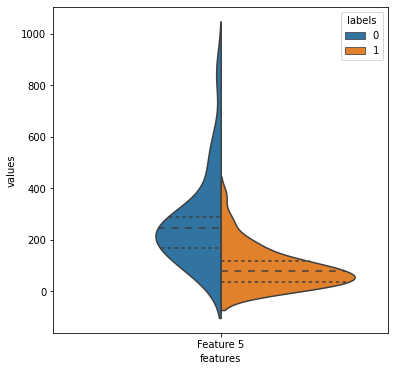

In [29]:
fig,ax_feature6 = plt.subplots(1,1,figsize = (6,6))
sns.violinplot(x = 'features',y = 'values',hue = 'labels',data = df_eda_melt.loc[df_eda_melt["features"].isin(["Feature 5"])],split = True,ax = ax_feature6,inner='quartile')

In [30]:
oneway_anova(df_eda.loc[df_eda["labels"] == 0]["Feature 5"],df_eda.loc[df_eda["labels"] == 1]["Feature 5"])

Mean difference is statistically significant with pvalue of 1.4312448247390795e-08


Conclusion:

Feature 5: NK (cells/ul)

The mean value of each class for Feature 5 is significantly different with a very low p value. Hence it can act as a good feature to separate classification of labels. We can see that 75% of all class 1 cases occur before the 25th percentile value of label 0. Hence we can create a new categorical variable on label 1 which labels training instances as high risk if NK (cells/ul) is below the 75th percentile line of Feature 5 with respect to label 1.

<AxesSubplot:xlabel='features', ylabel='values'>

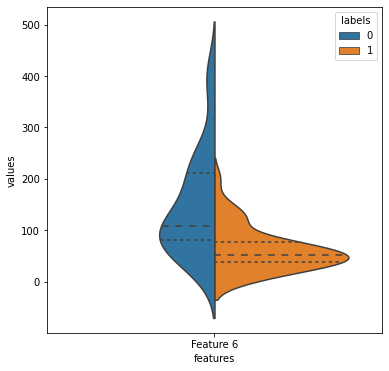

In [31]:
fig,ax_feature7 = plt.subplots(1,1,figsize = (6,6))
sns.violinplot(x = 'features',y = 'values',hue = 'labels',data = df_eda_melt.loc[df_eda_melt["features"].isin(["Feature 6"])],split = True,ax = ax_feature7,inner='quartile')

In [32]:
oneway_anova(df_eda.loc[df_eda["labels"] == 0]["Feature 6"],df_eda.loc[df_eda["labels"] == 1]["Feature 6"])

Mean difference is statistically significant with pvalue of 7.729981766043981e-07


Conclusion:

Feature 6: CD19+ (cells/ul)

The mean value of each class for Feature 6 is significantly different with a very low p value. Hence it can act as a good feature to separate classification of labels.

<AxesSubplot:xlabel='features', ylabel='values'>

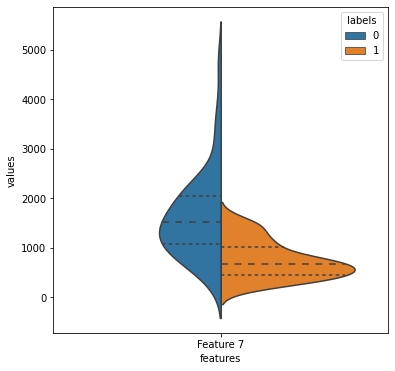

In [33]:
fig,ax_feature8 = plt.subplots(1,1,figsize = (6,6))
sns.violinplot(x = 'features',y = 'values',hue = 'labels',data = df_eda_melt.loc[df_eda_melt["features"].isin(["Feature 7"])],split = True,ax = ax_feature8,inner='quartile')

In [34]:
oneway_anova(df_eda.loc[df_eda["labels"] == 0]["Feature 7"],df_eda.loc[df_eda["labels"] == 1]["Feature 7"])

Mean difference is statistically significant with pvalue of 1.2310613056392516e-08


Conclusion:

Feature 7: CD45+ (cells/ul)

The mean value of each class for Feature 7 is significantly different with a very low p value. Hence it can act as a good feature to separate classification of labels. We can see that 75% of all class 1 cases occur before the 25th percentile value of label 0. Hence we can create a new categorical variable on label 1 which labels training instances as high risk if CD45+ (cells/ul) is below the 75th percentile line of Feature 7 with respect to label 1.

<AxesSubplot:xlabel='features', ylabel='values'>

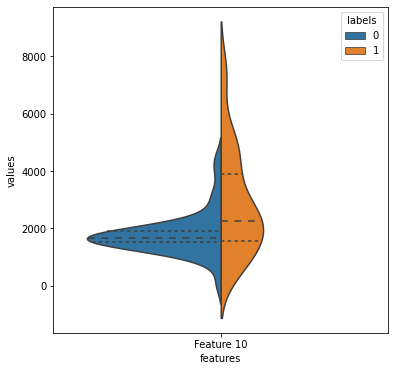

In [35]:
fig,ax_feature9 = plt.subplots(1,1,figsize = (6,6))
sns.violinplot(x = 'features',y = 'values',hue = 'labels',data = df_eda_melt.loc[df_eda_melt["features"].isin(["Feature 10"])],split = True,ax = ax_feature9,inner='quartile')

In [36]:
oneway_anova(df_eda.loc[df_eda["labels"] == 0]["Feature 10"],df_eda.loc[df_eda["labels"] == 1]["Feature 10"])

Mean difference is statistically significant with pvalue of 0.00043668360366973946


Conclusion:

Feature 10: Mono CD64+MFI (cells/ul)

The mean value of each class for Feature 10 is significantly different. Hence it can act as a good feature to separate classification of labels. 

From the above analysis, the features other than Feature 0 and Feature 10, can act as very good features to do classification on. While Feature 0 and Feature 10 are satistically different in mean, their p values are not low compared to the other Features

Age

<AxesSubplot:xlabel='features', ylabel='values'>

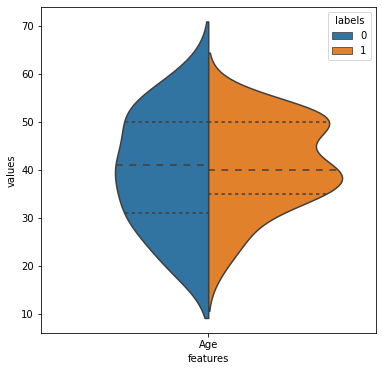

In [37]:
fig,ax_feature10 = plt.subplots(1,1,figsize = (6,6))
sns.violinplot(x = 'features',y = 'values',hue = 'labels',data = df_eda_melt.loc[df_eda_melt["features"].isin(["Age"])],split = True,ax = ax_feature10,inner='quartile')

In [38]:
oneway_anova(df_eda.loc[df_eda["labels"] == 0]["Age"],df_eda.loc[df_eda["labels"] == 1]["Age"])

Mean difference is statistically not significant with pvalue of 0.5030315223271603


Conclusion:

Feature: Age

The mean value of each class for Age is not significantly different as seen by both the violin plot and the pvalue of the ANOVA test, which is grester than 0.05.

Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

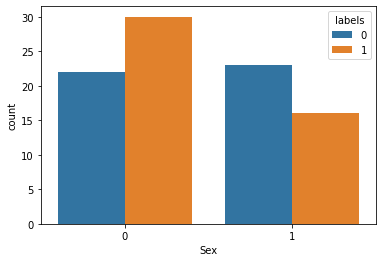

In [39]:
sns.countplot(x = "Sex",hue = "labels",data = df_eda) 

In [40]:
#counts of Sex = 0 for label = 0 and 1
{k:grp.shape[0] for k,grp in df_eda.loc[df_eda["Sex"] == 0].groupby("labels")}

{0: 22, 1: 30}

In [41]:
#counts of Sex = 0 for label = 0 and 1
{k:grp.shape[0] for k,grp in df_eda.loc[df_eda["Sex"] == 1].groupby("labels")}

{0: 23, 1: 16}

Conclusion

As seen above, there is no useful split between 0 and 1 labels between the 2 genders. 

<AxesSubplot:>

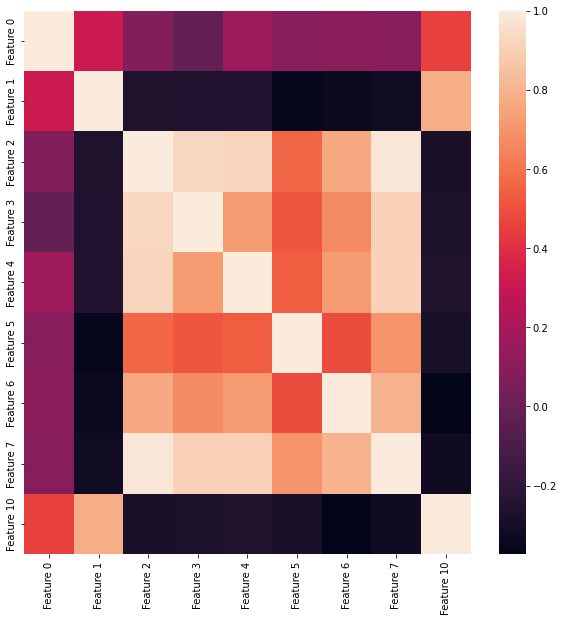

In [42]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(df_eda[[i for i in df_eda.columns.tolist() if i not in ["Age","Sex","labels"]]].corr(),ax = ax)

In [43]:
df_eda[[i for i in df_eda.columns.tolist() if i not in ["Age","Sex","labels"]]].corr()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 10
Feature 0,1.000000,0.309535,0.084907,-0.017188,0.167808,0.095924,0.107569,0.095166,0.448668
Feature 1,0.309535,1.000000,-0.263279,-0.257966,-0.247799,-0.352519,-0.331111,-0.312328,0.783317
Feature 2,0.084907,-0.263279,1.000000,0.928126,0.918663,0.557423,0.760161,0.980420,-0.282096
Feature 3,-0.017188,-0.257966,0.928126,1.000000,0.721247,0.515362,0.672205,0.908317,-0.275016
Feature 4,0.167808,-0.247799,0.918663,0.721247,1.000000,0.538171,0.725198,0.907972,-0.261711
Feature 5,0.095924,-0.352519,0.557423,0.515362,0.538171,1.000000,0.487573,0.698866,-0.282535
Feature 6,0.107569,-0.331111,0.760161,0.672205,0.725198,0.487573,1.000000,0.801243,-0.373584
Feature 7,0.095166,-0.312328,0.980420,0.908317,0.907972,0.698866,0.801243,1.000000,-0.317453
Feature 10,0.448668,0.783317,-0.282096,-0.275016,-0.261711,-0.282535,-0.373584,-0.317453,1.000000
